In [1]:
import sys
sys.path.append('/lmh_data/work/SEE/train/')
sys.path.append('/lmh_data/work/SEE/analyse/')

import math
import numpy as np
import pandas as pd
import pyBigWig
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm

from util import array2mat, mat2array
from analyse_util import figure_size, set_plt, set_Border

/root/miniconda3/envs/sclab/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
resolution = 10000

diff_hic_dir = '/lmh_data/work/SEE/analyse/dynamic_interaction/tmp'
diff_hic = {}
for cell_type in ['Astro', 'ODC']:
    for gene_name in ['SLC1A2', 'SLC1A3', 'GPM6A', 'MBP', 'QKI', 'DOCK10']:
        diff_hic[(cell_type, gene_name)] = np.load(
            '{}/{}_{}_diffhic.npy'.format(diff_hic_dir, cell_type, gene_name), allow_pickle=True).item()

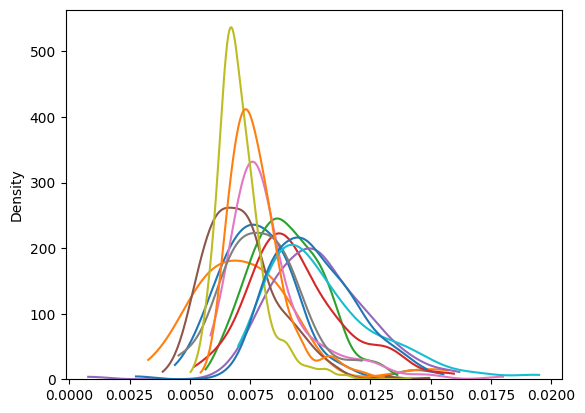

In [3]:
def get_dynamic_values(mat):
    _mat = mat.copy()
    row_indices, col_indices = np.triu_indices(_mat.shape[0])
    mask = row_indices != col_indices
    upper_triangle_values = _mat[row_indices[mask], col_indices[mask]]
    return upper_triangle_values

for key in diff_hic.keys():
    sns.kdeplot(get_dynamic_values(diff_hic[key]['diff_hic']), cut=0)
plt.show()

In [4]:
dynamic_values = pd.DataFrame()
for key in diff_hic.keys():
    cell_type, gene_name = key
    
    _df = pd.DataFrame()
    _df['vibration_score'] = get_dynamic_values(diff_hic[key]['diff_hic'])
    _df['switch_score'] = get_dynamic_values(diff_hic[key]['diff_frequency_hic'])
    _df['gene_name'] = gene_name
    _df['cell_type'] = cell_type
    dynamic_values = pd.concat([dynamic_values, _df], axis=0)
dynamic_values

,vibration_score,switch_score,gene_name,cell_type
0,0.009110,0.571429,SLC1A2,Astro
1,0.007356,0.380952,SLC1A2,Astro
2,0.005374,0.190476,SLC1A2,Astro
3,0.008812,0.428571,SLC1A2,Astro
4,0.006946,0.380952,SLC1A2,Astro
...,...,...,...,...
430,0.007955,0.545852,DOCK10,ODC
431,0.007058,0.427948,DOCK10,ODC
432,0.009385,0.602620,DOCK10,ODC
433,0.007703,0.493450,DOCK10,ODC


In [5]:
print(dynamic_values["vibration_score"].quantile(0.95))
print(dynamic_values["vibration_score"].quantile(0.75))

print(dynamic_values["switch_score"].quantile(0.95))
print(dynamic_values["switch_score"].quantile(0.75))

0.01181660246636186
0.009295439386429885
0.6428571428571429
0.5327510917030568


In [6]:
dynamic_values['variable'] = False
dynamic_values.loc[
    (dynamic_values['gene_name'].isin(['SLC1A2', 'SLC1A3', 'GPM6A']))&(dynamic_values['cell_type'] == 'Astro'),
    'variable'
] = True
dynamic_values.loc[
    (dynamic_values['gene_name'].isin(['MBP', 'QKI', 'DOCK10']))&(dynamic_values['cell_type'] == 'ODC'),
    'variable'
] = True

dynamic_values

,vibration_score,switch_score,gene_name,cell_type,variable
0,0.009110,0.571429,SLC1A2,Astro,True
1,0.007356,0.380952,SLC1A2,Astro,True
2,0.005374,0.190476,SLC1A2,Astro,True
3,0.008812,0.428571,SLC1A2,Astro,True
4,0.006946,0.380952,SLC1A2,Astro,True
...,...,...,...,...,...
430,0.007955,0.545852,DOCK10,ODC,True
431,0.007058,0.427948,DOCK10,ODC,True
432,0.009385,0.602620,DOCK10,ODC,True
433,0.007703,0.493450,DOCK10,ODC,True


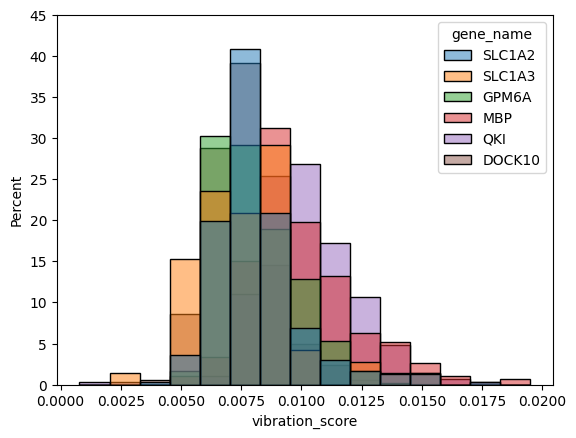

In [7]:
sns.histplot(dynamic_values, x='vibration_score', stat='percent', hue='gene_name', bins=15, common_norm=False)
plt.yticks([i for i in range(0, 50, 5)])
plt.savefig('/lmh_data/work/SEE/analyse/figure_file/vibration/vibration_score_distribution.pdf', bbox_inches='tight')
plt.show()

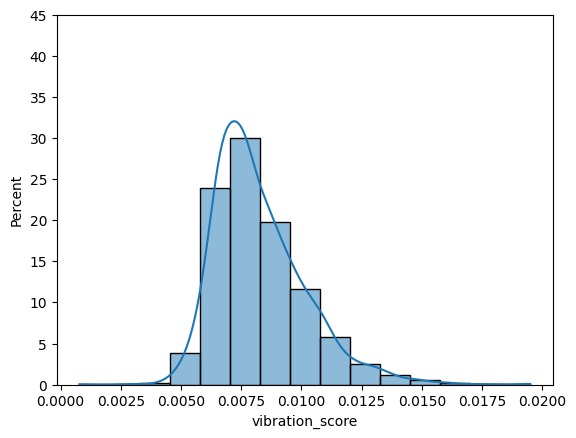

In [8]:
sns.histplot(dynamic_values, x='vibration_score', stat='percent', bins=15, kde=True)
plt.yticks([i for i in range(0, 50, 5)])
plt.savefig('/lmh_data/work/SEE/analyse/figure_file/vibration/vibration_score_kde.pdf', bbox_inches='tight')
plt.show()

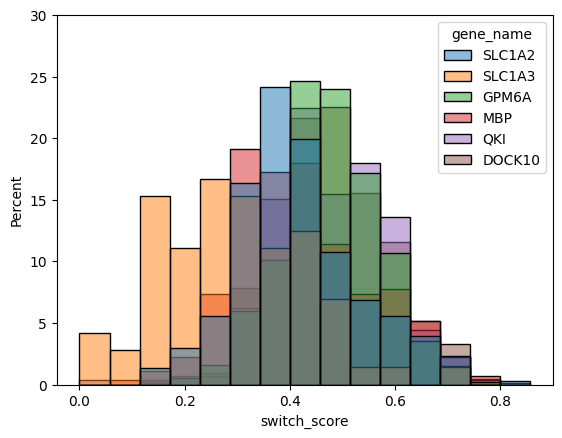

In [9]:
sns.histplot(dynamic_values, x='switch_score', stat='percent', hue='gene_name', bins=15, common_norm=False)
plt.yticks([i for i in range(0, 35, 5)])
plt.savefig('/lmh_data/work/SEE/analyse/figure_file/vibration/switch_score_distribution.pdf', bbox_inches='tight')
plt.show()

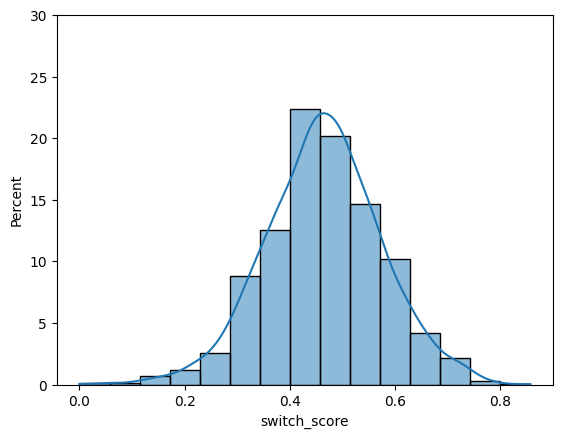

In [10]:
sns.histplot(dynamic_values, x='switch_score', stat='percent', bins=15, kde=True)
plt.yticks([i for i in range(0, 35, 5)])
plt.savefig('/lmh_data/work/SEE/analyse/figure_file/vibration/switch_score_kde.pdf', bbox_inches='tight')
plt.show()

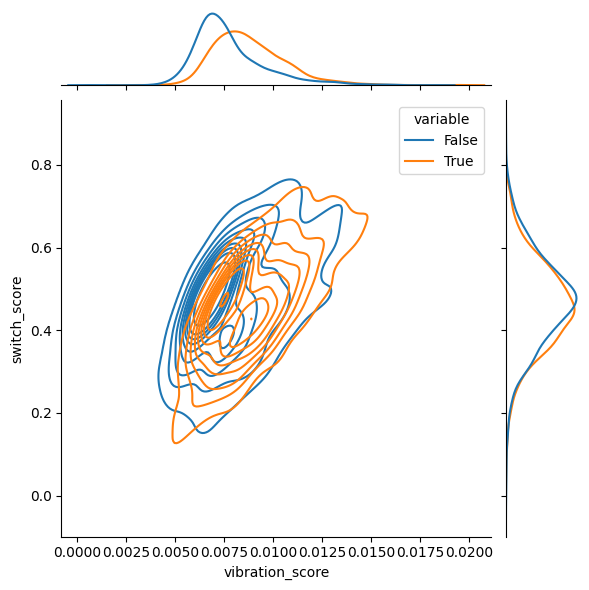

In [11]:
sns.jointplot(dynamic_values, x="vibration_score", y="switch_score", hue="variable", kind="kde", common_norm=True)
plt.savefig('/lmh_data/work/SEE/analyse/figure_file/vibration/variable_distribution.pdf', bbox_inches='tight')
plt.show()

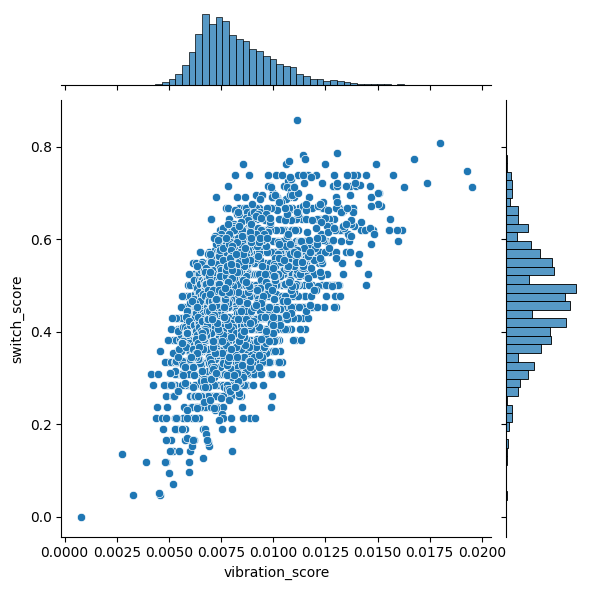

In [12]:
sns.jointplot(dynamic_values, x="vibration_score", y="switch_score")

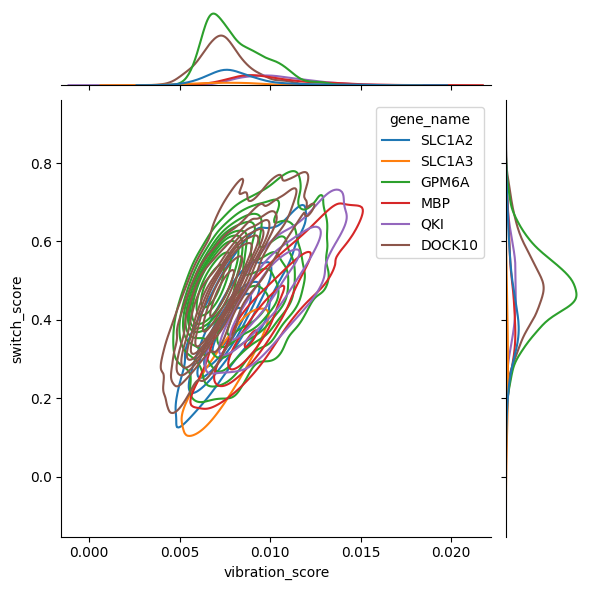

In [13]:
sns.jointplot(dynamic_values, x="vibration_score", y="switch_score", hue="gene_name", kind="kde", common_norm=True)